# Questão 4 da Lista 2: Redes Neurais

### Agrupando os imports

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import itertools

from sklearn import svm
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

plt.style.use('seaborn-darkgrid')


### Gerando e rotulando os dados

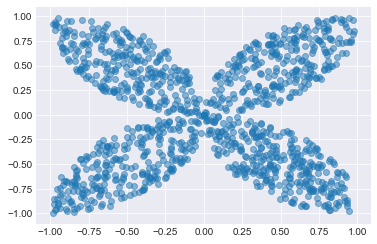

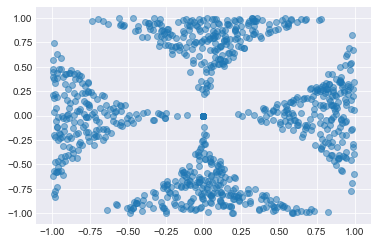

In [4]:
n = 2000 #número de pontos gerados
data_train = np.zeros((n,2))
labels_train = np.zeros(n)

classe1 = np.zeros((n,2))
classe2 = np.zeros((n,2))

#gerando pontos no primeiro quadrante
for i in range(0,n):
        data_train[i,0] = np.random.uniform(-1, high=1)
        data_train[i,1] = np.random.uniform(-1, high=1)
        
# fazer a rotulação dos dados
for i in range(0,n):
    if (data_train[i,0]-1)**2 + data_train[i,1]**2 < 1 or (data_train[i,0]+1)**2 + data_train[i,1]**2 < 1 :
        if data_train[i,0]**2 + (data_train[i,1]-1)**2 < 1 or data_train[i,0]**2 + (data_train[i,1]+1)**2 < 1:
            labels_train[i] = 0
        else:
            labels_train[i] = 1
    else:
        labels_train[i] = 1
        
for i in range(0,n):
    if labels_train[i] == 0:
        classe1[i,0] = data_train[i,0]
        classe1[i,1] = data_train[i,1]
        
for i in range(0,n):
    if labels_train[i] == 1:
        classe2[i,0] = data_train[i,0]
        classe2[i,1] = data_train[i,1]
        
#plt.scatter(data_train[:,0],data_train[:,1])
#plt.plot(classe1,labels_train)
plt.scatter(classe1[:,0],classe1[:,1],alpha='0.5')
plt.show()

plt.scatter(classe2[:,0],classe2[:,1],alpha='0.5')
plt.show()

### Gerando dados de validação

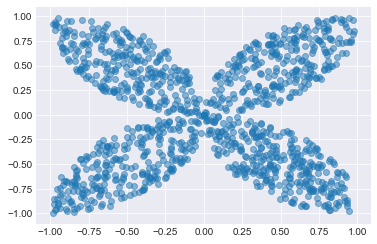

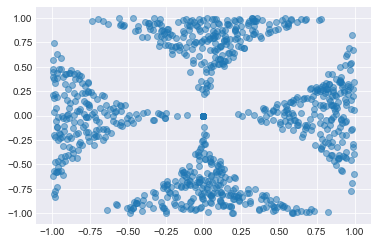

In [5]:
n = 2000 #número de pontos gerados
data_test = np.zeros((n,2))
labels_test = np.zeros(n)

classe1t = np.zeros((n,2))
classe2t = np.zeros((n,2))

#gerando pontos no primeiro quadrante
for i in range(0,n):
        data_test[i,0] = np.random.uniform(-1, high=1)
        data_test[i,1] = np.random.uniform(-1, high=1)
        
# fazer a rotulação dos dados
for i in range(0,n):
    if (data_test[i,0]-1)**2 + data_test[i,1]**2 < 1 or (data_test[i,0]+1)**2 + data_test[i,1]**2 < 1 :
        if data_test[i,0]**2 + (data_test[i,1]-1)**2 < 1 or data_test[i,0]**2 + (data_test[i,1]+1)**2 < 1:
            labels_test[i] = 0
        else:
            labels_test[i] = 1
    else:
        labels_test[i] = 1
        
for i in range(0,n):
    if labels_test[i] == 0:
        classe1t[i,0] = data_test[i,0]
        classe1t[i,1] = data_test[i,1]
        
for i in range(0,n):
    if labels_train[i] == 1:
        classe2t[i,0] = data_test[i,0]
        classe2t[i,1] = data_test[i,1]
        
#plt.scatter(data_train[:,0],data_train[:,1])
#plt.plot(classe1,labels_train)
plt.scatter(classe1[:,0],classe1[:,1],alpha='0.5')
plt.show()

plt.scatter(classe2[:,0],classe2[:,1],alpha='0.5')
plt.show()

## Classificando com uma MLP

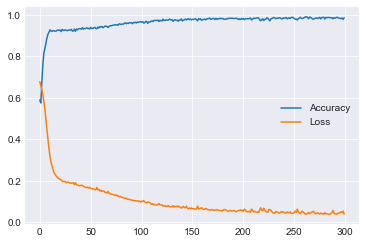

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [19]:
model = Sequential()

model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(data_train, labels_train,
          epochs=300,
          batch_size=100,
          verbose = 0)

plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')

plt.legend()
plt.show()

predicted = model.predict_classes(data_test)
predicted

### Plotando com o KERAS

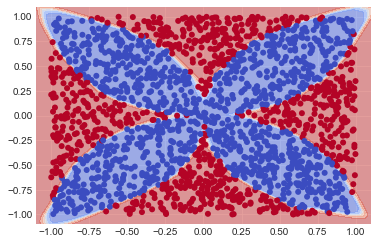

In [7]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    ymin, ymax = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(data_train, labels_train, model, cmap=plt.cm.coolwarm)
plt.show()

### Plotando a matriz de confusão

Confusion matrix, without normalization
[[1103   10]
 [  37  850]]


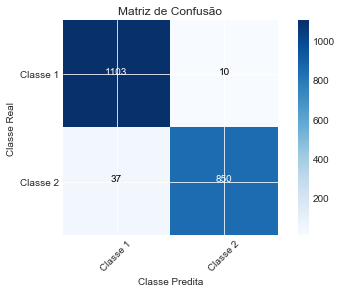

In [27]:
cnf_matrix = confusion_matrix(labels_test, predicted)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    
    
# Plot non-normalized confusion matrix
class_names = ['Classe 1','Classe 2']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de Confusão')

### Classificando com uma SVM

In [29]:
model = svm.SVC(kernel='rbf', C=1, gamma=2) 
model.fit(data_train, labels_train)

#Predict Output
predicted = model.predict(data_test)
predicted

array([0., 0., 0., ..., 0., 1., 0.])

### Plotando os limites de decisão gerados pela SVM

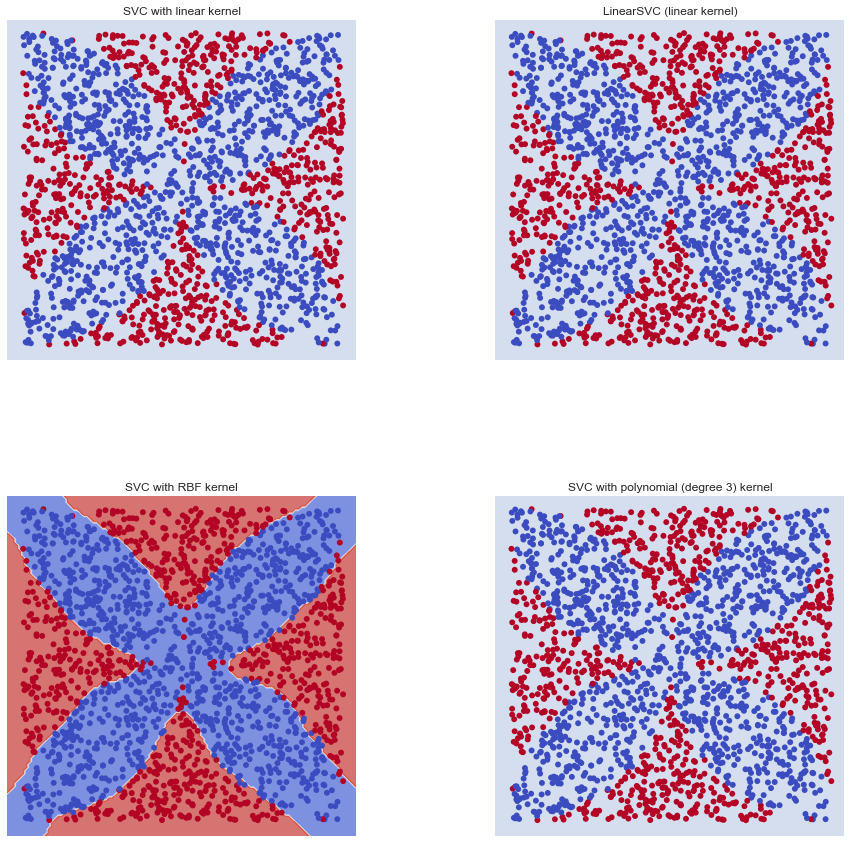

In [57]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=15, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

models = (clf.fit(data_train, labels_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = data_test[:, 0], data_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(X0, X1, c=labels_test, cmap=plt.cm.coolwarm, s=35, edgecolors='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Plotando a Matriz de Confusão

Confusion matrix, without normalization
[[1096   17]
 [ 171  716]]


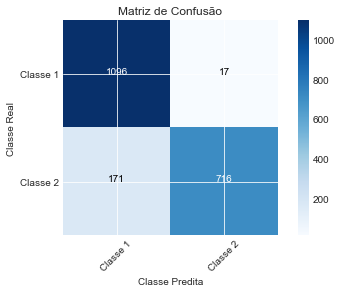

In [30]:
cnf_matrix = confusion_matrix(labels_test, predicted)

# Plot non-normalized confusion matrix
class_names = ['Classe 1','Classe 2']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de Confusão')